In [8]:

import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Number of customers
num_customers = 1000

# Generate random values for purchase frequency and total amount spent
purchase_frequency = np.random.randint(1, 11, size=num_customers)  # Random integers between 1 and 10
total_amount_spent = np.random.uniform(10, 500, size=num_customers)  # Random uniform distribution between 10 and 500

# Create a DataFrame to store the data
customer_data = pd.DataFrame({
    'CustomerID': range(1, num_customers + 1),
    'Purchase Frequency': purchase_frequency,
    'Total Amount Spent': total_amount_spent
})

# Save the dataset to a CSV file
customer_data.to_csv('customer_purchase_history.csv', index=False)

# Display the first few rows of the dataset
print(customer_data.head())

   CustomerID  Purchase Frequency  Total Amount Spent
0           1                   7          135.447611
1           2                   4          365.786837
2           3                   8          300.551824
3           4                   5           60.084205
4           5                   7          460.187756


In [9]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [10]:
# Load the dataset
data = pd.read_csv('customer_purchase_history.csv')


In [11]:

# Assuming the dataset has features like purchase frequency, total amount spent, etc.
X = data[['Purchase Frequency', 'Total Amount Spent']]
     

In [12]:

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [13]:

# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


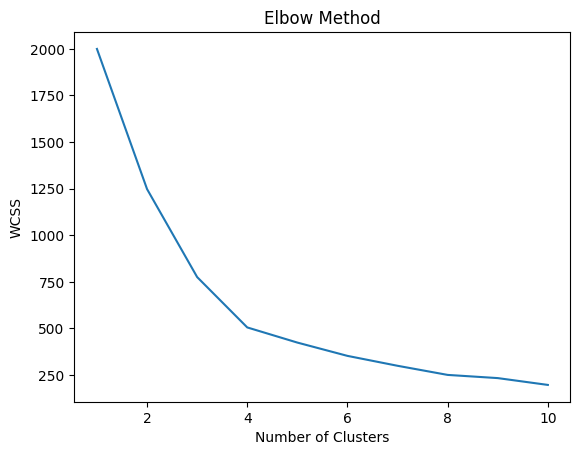

In [14]:

# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [15]:
# Based on the Elbow Method, let's say we choose 3 clusters
k = 5

# Apply K-means clustering
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original dataset
data['Cluster'] = clusters

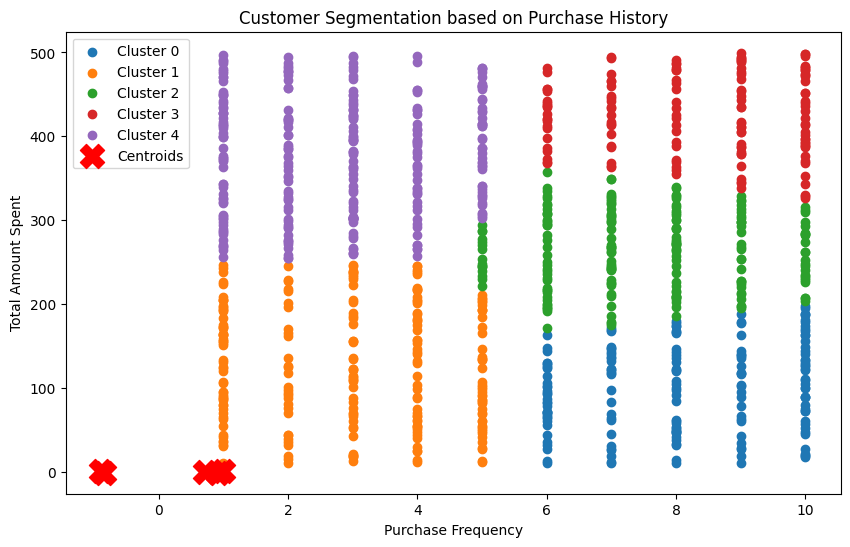

In [16]:

# Visualize the clusters
plt.figure(figsize=(10, 6))
for cluster in range(k):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['Purchase Frequency'], cluster_data['Total Amount Spent'], label=f'Cluster {cluster}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids', marker='X')
plt.title('Customer Segmentation based on Purchase History')
plt.xlabel('Purchase Frequency')
plt.ylabel('Total Amount Spent')
plt.legend()
plt.show()